## E COMMERCE CUSTOMER SERVICE SATISFACTION

In [360]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [361]:
dataframe = pd.read_csv('Customer_support_data.csv')
dataframe.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [362]:
df = dataframe.copy()

### Choosing the columns that are related to final CSAT score, regardless of how good or bad the relation. 

In [363]:

important_columns = ['category','Issue_reported at','issue_responded', 'Tenure Bucket', 'Agent Shift', 'CSAT Score','channel_name','Sub-category','Customer_City','Product_category','Item_price','Agent_name','Supervisor','Manager']


### Checking for empty values in each column

In [364]:

cleaned_data_frame = df[important_columns]
missing_values = cleaned_data_frame.isnull().sum()
print(missing_values)

category                 0
Issue_reported at        0
issue_responded          0
Tenure Bucket            0
Agent Shift              0
CSAT Score               0
channel_name             0
Sub-category             0
Customer_City        68828
Product_category     68711
Item_price           68701
Agent_name               0
Supervisor               0
Manager                  0
dtype: int64


### Removing the columns with too many empty values 

In [365]:

cleaned_data_frame = cleaned_data_frame.dropna(subset=['Item_price','Customer_City','Product_category'])

In [366]:
print(cleaned_data_frame)
cleaned_data_frame.head()

            category Issue_reported at   issue_responded    Tenure Bucket  \
11     Order Related  02/08/2023 10:44  02/08/2023 11:14              >90   
16           Returns  01/08/2023 09:01  01/08/2023 09:03             0-30   
19     Order Related  02/08/2023 20:03  02/08/2023 20:05            31-60   
24           Returns  01/08/2023 08:55  01/08/2023 08:57            31-60   
25     Order Related  02/08/2023 11:07  02/08/2023 11:10  On Job Training   
...              ...               ...               ...              ...   
85878       Feedback  31/08/2023 11:04  31/08/2023 11:25              >90   
85881  Order Related  31/08/2023 12:37  31/08/2023 12:38  On Job Training   
85886        Returns  31/08/2023 10:56  31/08/2023 11:02              >90   
85900  Order Related  31/08/2023 11:42  31/08/2023 11:45              >90   
85901  Order Related  29/08/2023 19:13  31/08/2023 15:11              >90   

      Agent Shift  CSAT Score channel_name              Sub-category  \
11 

,category,Issue_reported at,issue_responded,Tenure Bucket,Agent Shift,CSAT Score,channel_name,Sub-category,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager
11,Order Related,02/08/2023 10:44,02/08/2023 11:14,>90,Split,1,Inbound,Delayed,NAGPUR,LifeStyle,434.0,Stanley Hogan,Harper Wong,Emily Chen
16,Returns,01/08/2023 09:01,01/08/2023 09:03,0-30,Morning,5,Inbound,Service Centres Related,RANCHI,Electronics,1299.0,Amy Mendez,Sophia Sato,John Smith
19,Order Related,02/08/2023 20:03,02/08/2023 20:05,31-60,Evening,5,Inbound,Installation/demo,NAGPUR,Electronics,15990.0,David Butler,Olivia Wang,Emily Chen
24,Returns,01/08/2023 08:55,01/08/2023 08:57,31-60,Morning,5,Inbound,Reverse Pickup Enquiry,BETIA,Electronics,1099.0,Cynthia Mills,William Park,John Smith
25,Order Related,02/08/2023 11:07,02/08/2023 11:10,On Job Training,Morning,1,Inbound,Order status enquiry,NEW DELHI,Mobile,99999.0,Michelle Williams,Mason Gupta,Jennifer Nguyen


In [367]:
cleaned_data_frame_copy = cleaned_data_frame.copy()

### The connected handling time is usually a good variable that determines CSAT score but it had a lot of missing value rendering it useless for our data exploration. Hence we decided to find the response time by subtracting the two variables(issue reported time and issue responded time)

In [368]:
cleaned_data_frame['Issue_reported at'] = pd.to_datetime(cleaned_data_frame['Issue_reported at'], errors='coerce')
cleaned_data_frame['issue_responded'] = pd.to_datetime(cleaned_data_frame['issue_responded'], errors='coerce')

cleaned_data_frame_copy = cleaned_data_frame.copy()
cleaned_data_frame_copy['Response time'] = (cleaned_data_frame_copy['issue_responded'] - cleaned_data_frame_copy['Issue_reported at']).dt.total_seconds() // 60

print(cleaned_data_frame_copy['Response time'])


11       30.0
16        2.0
19        2.0
24        2.0
25        3.0
         ... 
85878     NaN
85881     NaN
85886     NaN
85900     NaN
85901     NaN
Name: Response time, Length: 17061, dtype: float64


### Removing NULL rows in the Response time column


In [369]:
# Filter out rows with NaT values in the 'Response time' column
cleaned_data_frame_copy = cleaned_data_frame_copy[~cleaned_data_frame_copy['Response time'].isna()]

# Print the DataFrame after filtering out rows with NaT values in the 'Response time' column
print(cleaned_data_frame_copy)


            category   Issue_reported at     issue_responded    Tenure Bucket  \
11     Order Related 2023-02-08 10:44:00 2023-02-08 11:14:00              >90   
16           Returns 2023-01-08 09:01:00 2023-01-08 09:03:00             0-30   
19     Order Related 2023-02-08 20:03:00 2023-02-08 20:05:00            31-60   
24           Returns 2023-01-08 08:55:00 2023-01-08 08:57:00            31-60   
25     Order Related 2023-02-08 11:07:00 2023-02-08 11:10:00  On Job Training   
...              ...                 ...                 ...              ...   
34629   Cancellation 2023-11-08 22:06:00 2023-11-08 22:10:00             0-30   
34635  Order Related 2023-11-08 19:45:00 2023-12-08 00:11:00            31-60   
34637        Returns 2023-09-08 18:18:00 2023-11-08 09:28:00  On Job Training   
34638  Order Related 2023-12-08 19:42:00 2023-12-08 20:00:00             0-30   
34639        Returns 2023-11-08 12:00:00 2023-11-08 12:47:00              >90   

      Agent Shift  CSAT Sco

## Analysing the statistical summaries of the cleaned dataset

In [370]:
cleaned_data_frame_copy.head()

,category,Issue_reported at,issue_responded,Tenure Bucket,Agent Shift,CSAT Score,channel_name,Sub-category,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Response time
11,Order Related,2023-02-08 10:44:00,2023-02-08 11:14:00,>90,Split,1,Inbound,Delayed,NAGPUR,LifeStyle,434.0,Stanley Hogan,Harper Wong,Emily Chen,30.0
16,Returns,2023-01-08 09:01:00,2023-01-08 09:03:00,0-30,Morning,5,Inbound,Service Centres Related,RANCHI,Electronics,1299.0,Amy Mendez,Sophia Sato,John Smith,2.0
19,Order Related,2023-02-08 20:03:00,2023-02-08 20:05:00,31-60,Evening,5,Inbound,Installation/demo,NAGPUR,Electronics,15990.0,David Butler,Olivia Wang,Emily Chen,2.0
24,Returns,2023-01-08 08:55:00,2023-01-08 08:57:00,31-60,Morning,5,Inbound,Reverse Pickup Enquiry,BETIA,Electronics,1099.0,Cynthia Mills,William Park,John Smith,2.0
25,Order Related,2023-02-08 11:07:00,2023-02-08 11:10:00,On Job Training,Morning,1,Inbound,Order status enquiry,NEW DELHI,Mobile,99999.0,Michelle Williams,Mason Gupta,Jennifer Nguyen,3.0


In [371]:


category_counts = cleaned_data_frame_copy['category'].value_counts()
print(category_counts )
print("\n")

tenure_counts = cleaned_data_frame_copy['Tenure Bucket'].value_counts()
print(tenure_counts)
print("\n")


  


category
Returns              3971
Order Related        2471
Refund Related        518
Cancellation          346
Feedback              218
Offers & Cashback      35
Payments related       31
Others                 14
Shopzilla Related      14
Product Queries         6
Name: count, dtype: int64


Tenure Bucket
>90                3018
31-60              1351
On Job Training    1324
0-30               1171
61-90               760
Name: count, dtype: int64




In [372]:
#summaries continued
agent_counts = cleaned_data_frame_copy['Agent Shift'].value_counts()
print(agent_counts)
print("\n")

channel_counts = cleaned_data_frame_copy['channel_name'].value_counts()
print(channel_counts)
print("\n")



Agent Shift
Morning      3661
Evening      2837
Afternoon     614
Split         383
Night         129
Name: count, dtype: int64


channel_name
Inbound    6487
Outcall     814
Email       323
Name: count, dtype: int64




In [373]:
sub_counts = cleaned_data_frame_copy['Sub-category'].value_counts()
print(sub_counts)
print("\n")



Sub-category
Reverse Pickup Enquiry              1667
Delayed                             1297
Return request                       925
Order status enquiry                 590
Fraudulent User                      432
Not Needed                           322
Installation/demo                    292
Refund Enquiry                       291
Wrong                                276
Missing                              237
Service Centres Related              231
Refund Related Issues                220
UnProfessional Behaviour             218
Exchange / Replacement               102
Invoice request                       90
Priority delivery                     72
Seller Cancelled Order                60
Technician Visit                      48
Damaged                               42
General Enquiry                       29
Customer Requested Modifications      27
Return cancellation                   24
Payment related Queries               19
Unable to track                       19
Oth

In [374]:
city_counts = cleaned_data_frame_copy['Customer_City'].value_counts()
print(city_counts)
print("\n")

Customer_City
NEW DELHI       321
HYDERABAD       308
MUMBAI          198
PUNE            184
BANGALORE       169
               ... 
MUKUNDAPURAM      1
ADOOR             1
RAJMAHAL          1
KHERALU           1
MARIAHU           1
Name: count, Length: 1291, dtype: int64




### Customer City has too many differing values,it would be insignificant to categorise CSAT into cities, hence we will drop it from the considered columns 

In [375]:

cleaned_data_frame_copy = cleaned_data_frame_copy.drop(columns=['Customer_City'])

In [376]:
#continuing with statistical analysis

product_counts = cleaned_data_frame_copy['Product_category'].value_counts()
print(product_counts)
print("\n")

price_counts = cleaned_data_frame_copy['Item_price'].describe()
print(price_counts)
print("\n")

Product_category
Electronics                    2244
LifeStyle                      1685
Books & General merchandise    1502
Mobile                          815
Home Appliences                 597
Home                            531
Furniture                       184
Affiliates                       60
GiftCard                          6
Name: count, dtype: int64


count      7624.000000
mean       5931.591291
std       12952.021459
min           0.000000
25%         399.000000
50%         999.000000
75%        2999.000000
max      134999.000000
Name: Item_price, dtype: float64




### The price data is flawed as no currency is specified in the data set and we would not be able to know the value of the products. Hence, we will be removing this column to prevent inaccuracy in data extrapolated. 


In [377]:

cleaned_data_frame_copy = cleaned_data_frame_copy.drop(columns=['Item_price'])

In [378]:
supervisor_counts = cleaned_data_frame_copy['Supervisor'].value_counts()
print(supervisor_counts)
print("\n")



Supervisor
Elijah Yamaguchi    412
Carter Park         396
Noah Patel          386
Nathan Patel        337
Emma Park           310
Zoe Yamamoto        306
William Park        295
Madison Kim         294
Mia Patel           294
Evelyn Kimura       285
Aiden Patel         276
Scarlett Chen       276
Logan Lee           263
Jackson Park        236
Brayden Wong        221
Lily Chen           210
Emily Yamashita     193
Ava Wong            188
Olivia Wang         184
Mason Gupta         169
Landon Tanaka       165
Amelia Tanaka       159
Sophia Sato         146
Olivia Suzuki       145
Ethan Tan           138
Austin Johnson      136
Wyatt Kim           130
Harper Wong         125
Jacob Sato          119
Abigail Suzuki      113
Isabella Wong       111
Alexander Tanaka    103
Ethan Nakamura      102
Layla Taniguchi     100
Lucas Singh          90
Dylan Kim            75
Charlotte Suzuki     55
Mia Yamamoto         44
Oliver Nguyen        27
Sophia Chen          10
Name: count, dtype: int64




In [379]:
name_counts = cleaned_data_frame_copy['Agent_name'].value_counts()
print(name_counts)
print("\n")

Agent_name
Wendy Taylor         45
Rebecca Walker       35
Andrea Conley        33
Elizabeth Rivera     30
Matthew White PhD    29
                     ..
Alyssa Jones          1
James Blackwell       1
Sara Juarez           1
Debbie Gomez          1
William Brown         1
Name: count, Length: 1211, dtype: int64




In [380]:
manager_counts = cleaned_data_frame_copy['Manager'].value_counts()
print(manager_counts)
print("\n")

Manager
John Smith         2605
Michael Lee        1959
Emily Chen         1548
Jennifer Nguyen     823
William Kim         456
Olivia Tan          233
Name: count, dtype: int64




### For both Agent name and supervisor, the same issue as the location (city), there's too many different categorical data types for it to be meaningful to include it into the data columns used, hence dropping it

In [381]:
cleaned_data_frame_copy = cleaned_data_frame_copy.drop(columns=['Agent_name','Supervisor',])

In [382]:
time_counts = cleaned_data_frame_copy['Response time'].describe()
print(time_counts)
print("\n")

count      7624.000000
mean      10697.920121
std       27111.619772
min           0.000000
25%           2.000000
50%           8.000000
75%         140.250000
max      177097.000000
Name: Response time, dtype: float64




## Data visualization, each influencing variable compared to CSAT score

In [383]:
cleaned_data_frame_copy = cleaned_data_frame_copy.drop(columns=['Issue_reported at','issue_responded',])

In [384]:
cleaned_data_frame_copy.head()

,category,Tenure Bucket,Agent Shift,CSAT Score,channel_name,Sub-category,Product_category,Manager,Response time
11,Order Related,>90,Split,1,Inbound,Delayed,LifeStyle,Emily Chen,30.0
16,Returns,0-30,Morning,5,Inbound,Service Centres Related,Electronics,John Smith,2.0
19,Order Related,31-60,Evening,5,Inbound,Installation/demo,Electronics,Emily Chen,2.0
24,Returns,31-60,Morning,5,Inbound,Reverse Pickup Enquiry,Electronics,John Smith,2.0
25,Order Related,On Job Training,Morning,1,Inbound,Order status enquiry,Mobile,Jennifer Nguyen,3.0


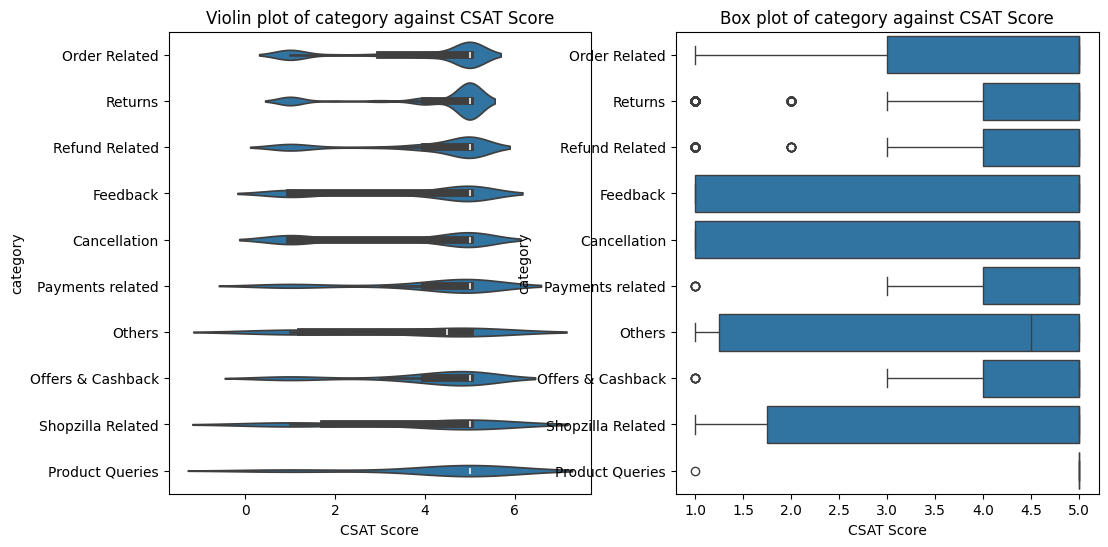

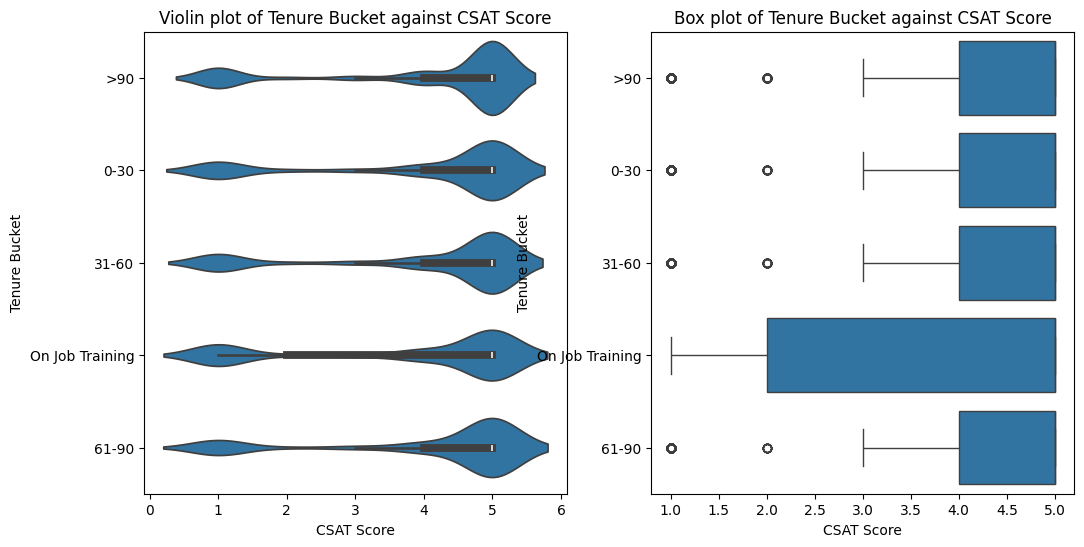

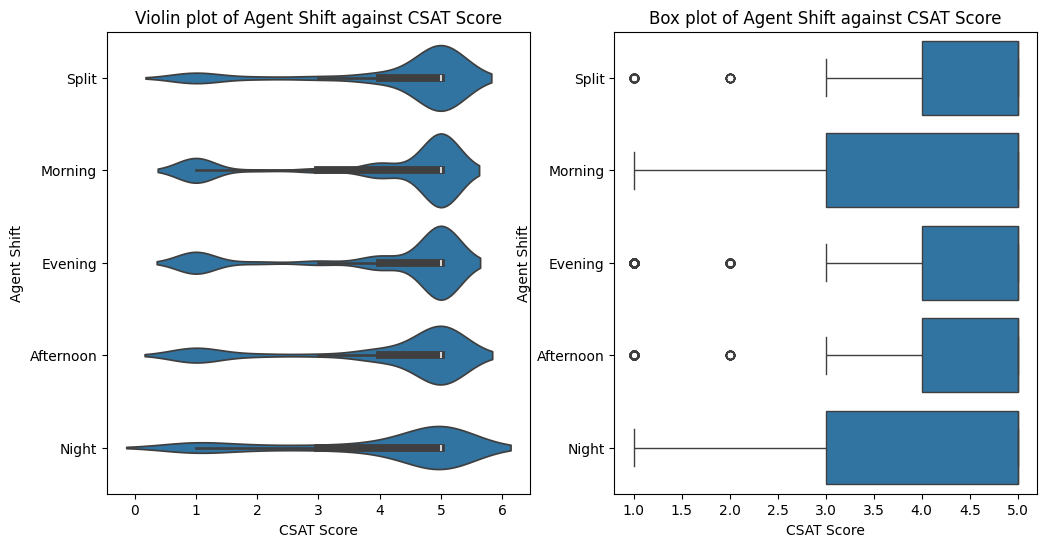

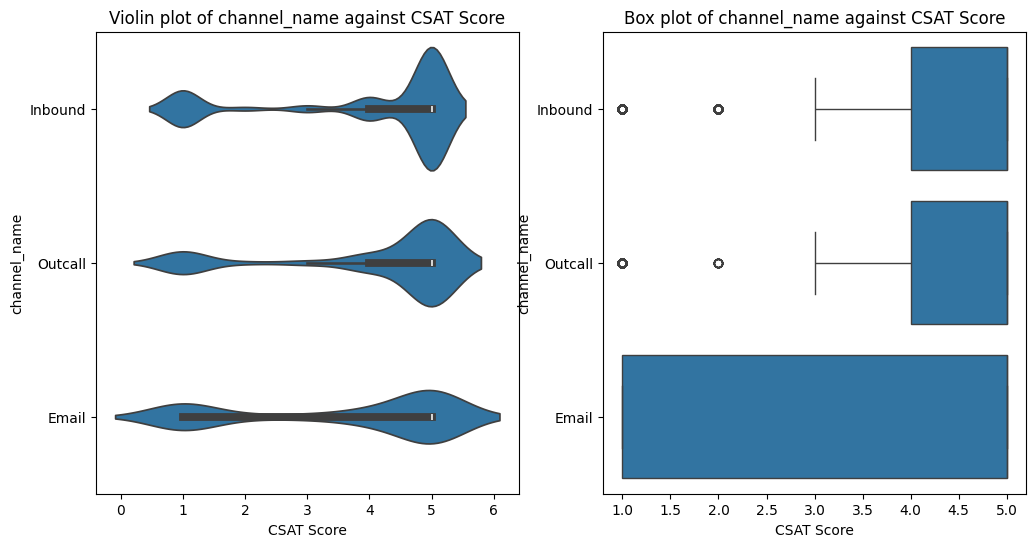

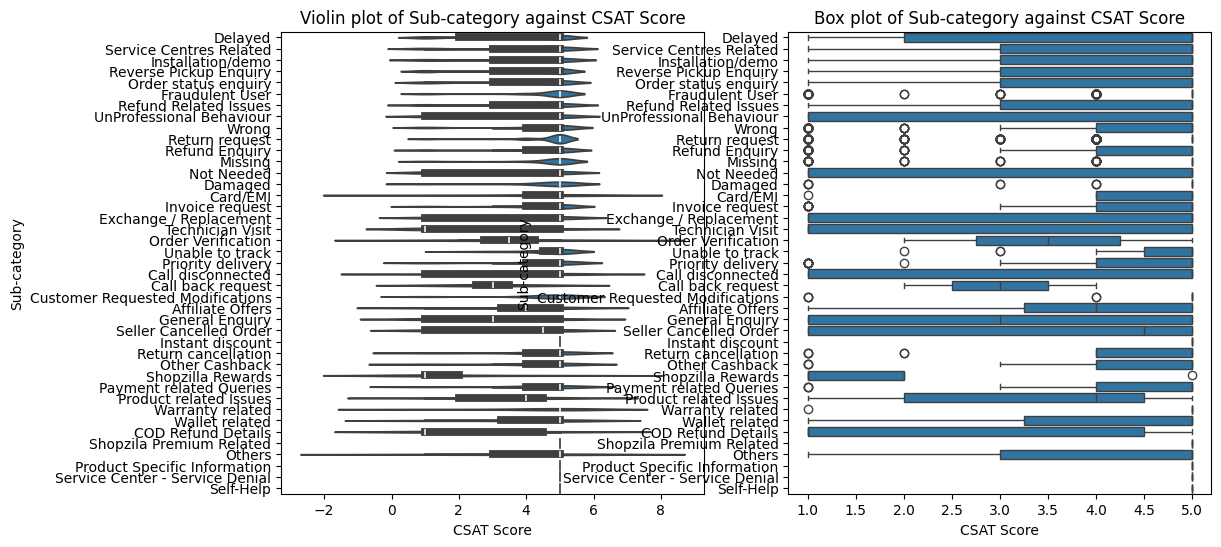

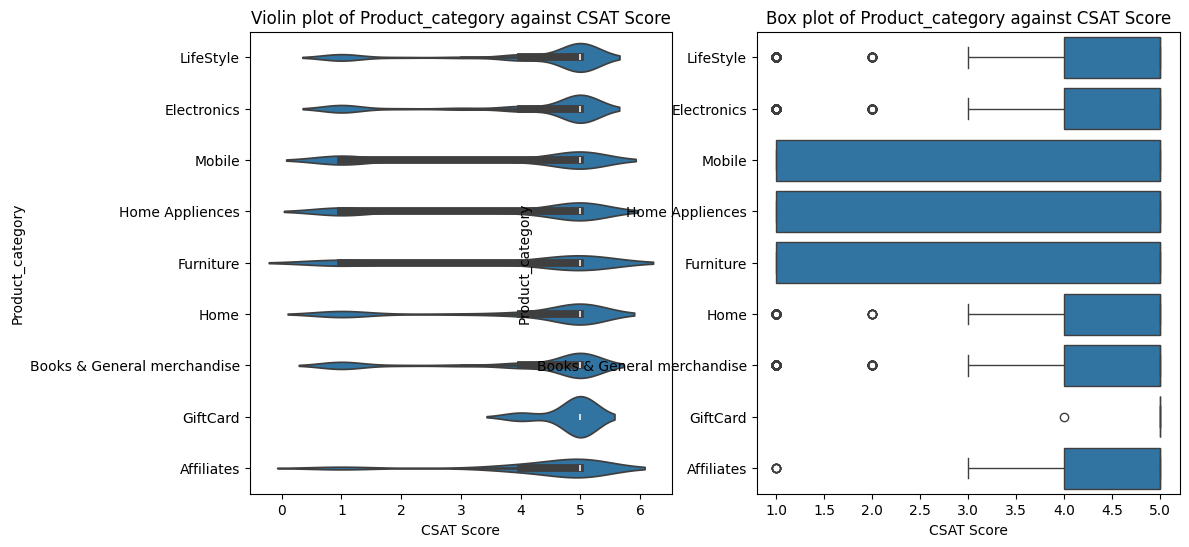

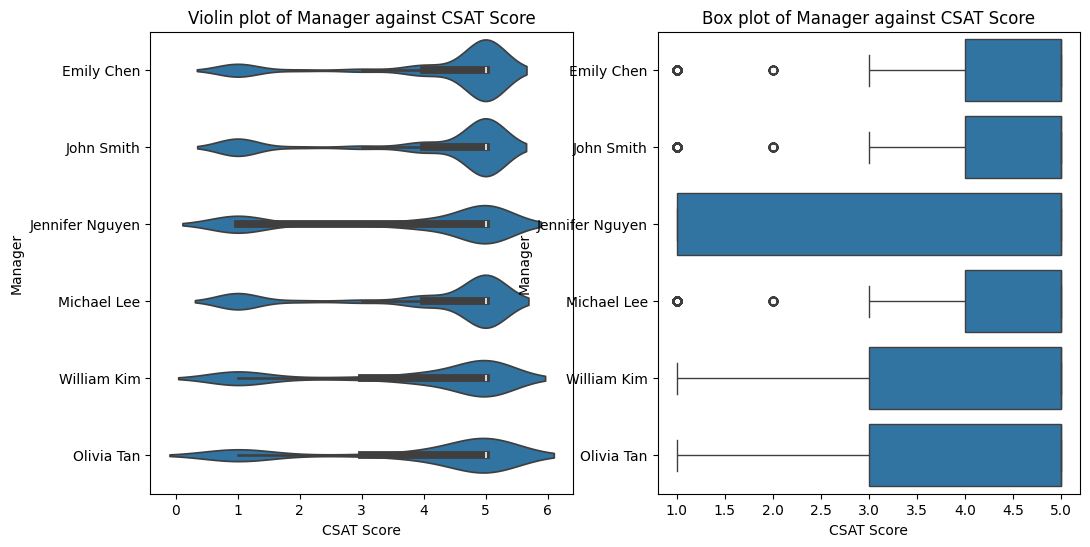

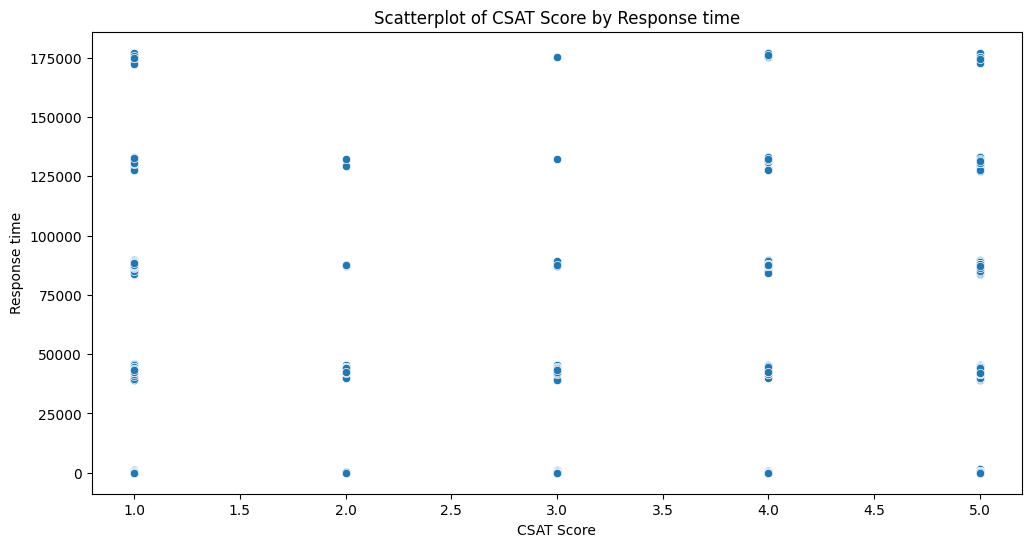

In [385]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns you want to compare with 'CSAT Score'
columns_to_compare = ['category', 'Tenure Bucket', 'Agent Shift', 'channel_name', 
                      'Sub-category', 'Product_category', 'Manager', 'Response time']

# Loop through each column and create plots
for column in columns_to_compare:
    plt.figure(figsize=(12, 6))
    
    if cleaned_data_frame_copy[column].dtype == 'object':
        # If the column is categorical, create a violin plot
        plt.subplot(1, 2, 1)
        sns.violinplot(y=column, x='CSAT Score', data=cleaned_data_frame_copy)
        plt.title(f'Violin plot of {column} against CSAT Score')
        plt.ylabel(column)
        plt.xlabel('CSAT Score')
        
        plt.subplot(1, 2, 2)
        # If the column is categorical, create a box plot
        sns.boxplot(y=column, x='CSAT Score', data=cleaned_data_frame_copy)
        plt.title(f'Box plot of {column} against CSAT Score')
        plt.ylabel(column)
        plt.xlabel('CSAT Score')
    else:
        # If the column is numerical, create a scatterplot
        sns.scatterplot(y=column, x='CSAT Score', data=cleaned_data_frame_copy)
        plt.title(f'Scatterplot of CSAT Score by {column}')
        plt.ylabel(column)
        plt.xlabel('CSAT Score')
    
    plt.show()


### Cleaning out outliers to make more accurate predictions in the machine learning later on

In [386]:
# Define your dataset name as 'cleaned_data_frame_copy'

# Function to remove outliers from numerical columns
def remove_numerical_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Function to remove outliers from categorical columns
def remove_categorical_outliers(df, column):
    value_counts = df[column].value_counts()
    # Define threshold for outlier categorical values (e.g., categories occurring less than 5 times)
    threshold = 5
    return df[df[column].isin(value_counts[value_counts >= threshold].index)]

# Apply outlier removal functions to each column
for column in cleaned_data_frame_copy.columns:
    if cleaned_data_frame_copy[column].dtype == 'object':
        cleaned_data_frame_copy = remove_categorical_outliers(cleaned_data_frame_copy, column)
    else:
        cleaned_data_frame_copy = remove_numerical_outliers(cleaned_data_frame_copy, column)

# Reset index
cleaned_data_frame_copy = cleaned_data_frame_copy.reset_index(drop=True)


## Applying PRINCIPAL COMPONENT ANALYSIS on the important variables to attain dimensionality reduction, used to simplify the dataset by transforming them into a lower-dimensional space while preserving most of the essential information.


Principal Component 1 (PC1):
This component captures the largest amount of variance in the data. It is primarily influenced by variables like channel_name, category, Response time, and Tenure Bucket, as indicated by their relatively high loadings. PC1 represents the main patterns or trends in the data that are shared among these variables.

Principal Component 2 (PC2):
PC2 captures the second-largest amount of variance in the data, orthogonal to PC1. It is influenced by variables such as Tenure Bucket, channel_name, and Response time, although some of these variables have negative loadings, suggesting an inverse relationship. PC2 represents additional patterns or trends in the data that are not captured by PC1.

In [387]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the variables affecting CSAT score
X = cleaned_data_frame_copy[['category', 'Tenure Bucket', 'Agent Shift', 'channel_name', 
                             'Sub-category', 'Product_category', 'Manager', 'Response time']]

# One-hot encode categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded.toarray())

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)



Explained Variance Ratio: [0.0128074  0.01050363]


#### The explained variance ratio of [0.0019574, 0.0016786] means that the first principal component explains approximately 0.19574% of the variance in the original data, while the second principal component explains approximately 0.16786% of the variance.

####   When converted to percentages, these values are approximately 0.19574% and 0.16786%, respectively.

#### These percentages are quite low, indicating that the two principal components capture only a small amount of the total variance in the data. This suggests that the original variables may not be well represented by the principal components, and the model may not be effective in reducing the dimensionality of the data. 

### To determine which variables are important in loading PCA Variables, each percentage of loading significance based on the dataset into the Principle Component Variables 1 and 2 are compared.



In [388]:
# Perform PCA on the standardized original features
pca = PCA(n_components=2, svd_solver='arpack')
X_pca = pca.fit_transform(X_scaled)

# Get the loadings of the original features onto the principal components
loadings = pca.components_

# List the variables represented by the principal components
for i, component in enumerate(loadings):
    print(f"Principal Component {i + 1}:")
    for j, variable in enumerate(X.columns):
        print(f"Variable {j + 1}: {variable}, Loading: {component[j]}")



Principal Component 1:
Variable 1: category, Loading: 0.05593541602491599
Variable 2: Tenure Bucket, Loading: 0.026973301803362285
Variable 3: Agent Shift, Loading: 0.026606387301456154
Variable 4: channel_name, Loading: 0.4739514975186442
Variable 5: Sub-category, Loading: 0.019780536082372485
Variable 6: Product_category, Loading: 0.015439236138071145
Variable 7: Manager, Loading: 0.056432505412546775
Variable 8: Response time, Loading: -0.5080487664151142
Principal Component 2:
Variable 1: category, Loading: 0.038793199256909494
Variable 2: Tenure Bucket, Loading: -0.15474403881870283
Variable 3: Agent Shift, Loading: -0.003896092362966726
Variable 4: channel_name, Loading: -0.060794468856058784
Variable 5: Sub-category, Loading: -0.006802693793666027
Variable 6: Product_category, Loading: -0.02127329465370633
Variable 7: Manager, Loading: -0.09869730175459725
Variable 8: Response time, Loading: 0.14686548748630412


To determine which variables are significant in PCA

Chi-Square Test of Independence: This test assesses whether there is a significant association between two categorical variables. In this context, it examines whether there is a relationship between each categorical variable (e.g., "category," "Tenure Bucket," etc.) and the CSAT score.

Cramér's V: Cramér's V is a measure of association between two categorical variables. It ranges from 0 to 1, where 0 indicates no association and 1 indicates a perfect association. In this context, Cramér's V values close to 0 suggest weak association, while values closer to 1 indicate a stronger association between the variables.

p-value: The p-value associated with each chi-square test indicates the probability of observing the obtained result (or more extreme) if the null hypothesis (no association) is true. A smaller p-value (< 0.05) suggests that there is evidence to reject the null hypothesis and conclude that there is a significant association between the variables. Conversely, a larger p-value (> 0.05) indicates insufficient evidence to reject the null hypothesis.

In [389]:
cleaned_data_frame_copy.head()

,category,Tenure Bucket,Agent Shift,CSAT Score,channel_name,Sub-category,Product_category,Manager,Response time
0,Returns,0-30,Morning,5,Inbound,Service Centres Related,Electronics,John Smith,2.0
1,Order Related,31-60,Evening,5,Inbound,Installation/demo,Electronics,Emily Chen,2.0
2,Returns,31-60,Morning,5,Inbound,Reverse Pickup Enquiry,Electronics,John Smith,2.0
3,Order Related,31-60,Morning,5,Inbound,Delayed,Home Appliences,Michael Lee,3.0
4,Returns,31-60,Evening,5,Inbound,Fraudulent User,LifeStyle,Michael Lee,1.0


#### For categorical variables, compared to categorical variable CSAT Score, the Chi square test of independance is used

In [390]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Your DataFrame columns
categorical_columns = ['category', 'Tenure Bucket', 'Agent Shift', 'channel_name', 'Sub-category', 'Product_category', 'Manager']
csat_score_column = 'CSAT Score'

# Calculate chi-square test of independence for each categorical variable
for column in categorical_columns:
    contingency_table = pd.crosstab(cleaned_data_frame_copy[column], cleaned_data_frame_copy[csat_score_column])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    cramers_v = np.sqrt(chi2 / (cleaned_data_frame_copy.shape[0] * min(contingency_table.shape) - 1))
    print(f"Chi-Square Test of Independence for {column}:")
    print(f"  Cramér's V: {cramers_v:.2f}")
    print(f"  p-value: {p:.4f}")
    print()

# You can also visualize the contingency tables and the results of the tests if needed


Chi-Square Test of Independence for category:
  Cramér's V: 0.04
  p-value: 0.0262

Chi-Square Test of Independence for Tenure Bucket:
  Cramér's V: 0.02
  p-value: 0.3710

Chi-Square Test of Independence for Agent Shift:
  Cramér's V: 0.03
  p-value: 0.1772

Chi-Square Test of Independence for channel_name:
  Cramér's V: 0.02
  p-value: 0.4069

Chi-Square Test of Independence for Sub-category:
  Cramér's V: 0.08
  p-value: 0.0226

Chi-Square Test of Independence for Product_category:
  Cramér's V: 0.03
  p-value: 0.4577

Chi-Square Test of Independence for Manager:
  Cramér's V: 0.03
  p-value: 0.3636



#### Since response time is Numerical, against categorical CSAT Score, we are able to use correlation efficient to determine its influence on CSAT score

Correlation between Response time and CSAT Score: -0.0660021752867596


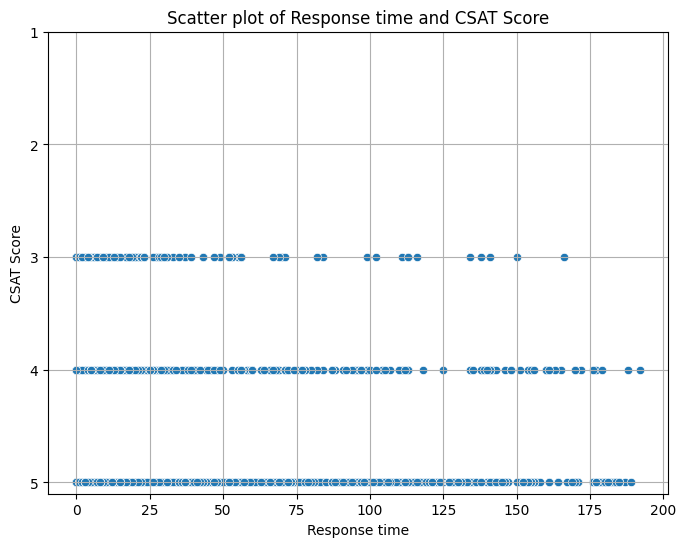

In [391]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert CSAT Score to categorical with appropriate labels
cleaned_data_frame_copy['CSAT Score'] = pd.Categorical(cleaned_data_frame_copy['CSAT Score'], categories=[1, 2, 3, 4, 5], ordered=True)

# Calculate Pearson correlation coefficient
correlation = cleaned_data_frame_copy[['Response time', 'CSAT Score']].corr()

# Visualize the relationship with a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Response time', y='CSAT Score', data=cleaned_data_frame_copy)
plt.title('Scatter plot of Response time and CSAT Score')
plt.xlabel('Response time')
plt.ylabel('CSAT Score')
plt.grid(True)

# Set ticks for CSAT Score axis
plt.yticks(ticks=[1, 2, 3, 4, 5])

# Print correlation coefficient
print("Correlation between Response time and CSAT Score:", correlation.iloc[0, 1])

plt.show()


#### Variables like "category," "Sub-category," and "Product_category" have relatively low loadings across both principal components and may have weak associations with "CSAT Score" based on the Chi-square test. Hence we are removing it from consideration into our PCA Variables

In [392]:
# Define the list of columns to remove
columns_to_remove = ["category", "Sub-category", "Product_category"]

# Drop the columns from the DataFrame
cleaned_data_frame_copy.drop(columns=columns_to_remove, inplace=True)


#### New PCA Variables and their explained variance, with the new combination of loaded variables 

In [393]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# Select the columns for PCA
X = cleaned_data_frame_copy[['Tenure Bucket', 'Agent Shift', 'channel_name', 'Manager', 'Response time']]

# One-hot encode categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded.toarray())

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)


Explained Variance Ratio: [0.01298636 0.01182787]


#### There’s a slight increase in the explained variance percentage from initially 0.19574% in PC1 to 1.2986% and from 0.16786% in PC2 to 1.1827%

#### Using the PCA variables for CSAT SCORE prediction, with the decision tree machine learning model, along with the accuracy scores and F1 scores of the predicted scores

F1 Score: 0.7129765164158266
Accuracy: 0.735966735966736


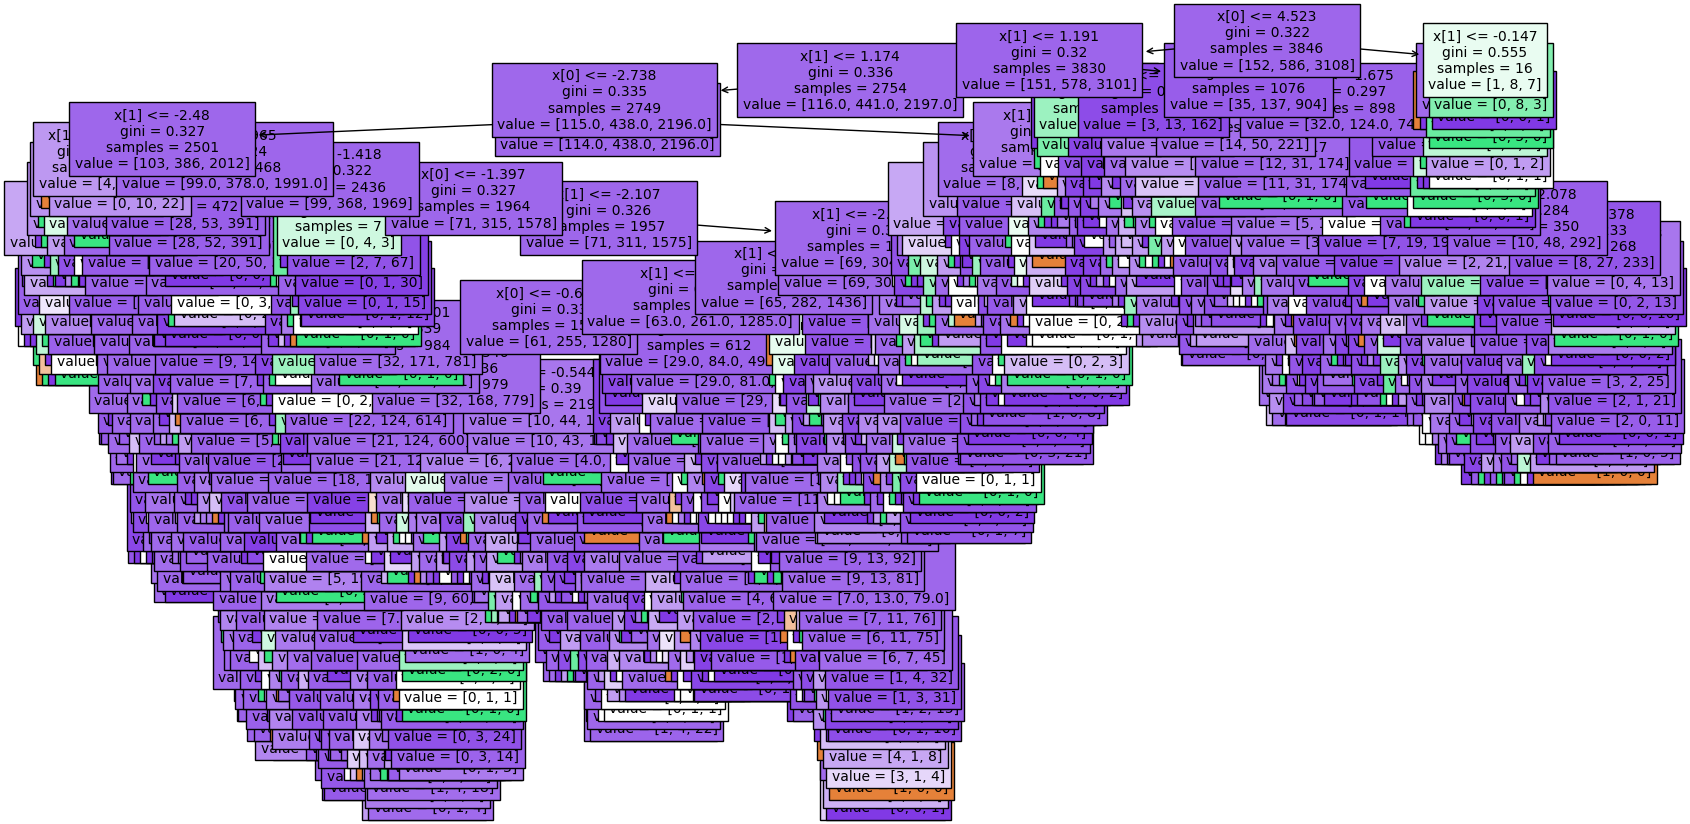

In [394]:
from sklearn.preprocessing import LabelEncoder

# Encode CSAT Score as categorical
label_encoder = LabelEncoder()
cleaned_data_frame_copy['CSAT Score'] = label_encoder.fit_transform(cleaned_data_frame_copy['CSAT Score'])

y = cleaned_data_frame_copy['CSAT Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust the figsize as needed
plot_tree(clf, filled=True, fontsize=10)
plt.show()



#### Using a usual multivariate decision tree with the initial cleaned variables from the cleaned dataset, namely [['Tenure Bucket', 'Agent Shift', 'channel_name', 'Manager', 'Response time']], instead of PCA variables

F1 Score: 0.7014626783699713
Accuracy: 0.7182952182952183


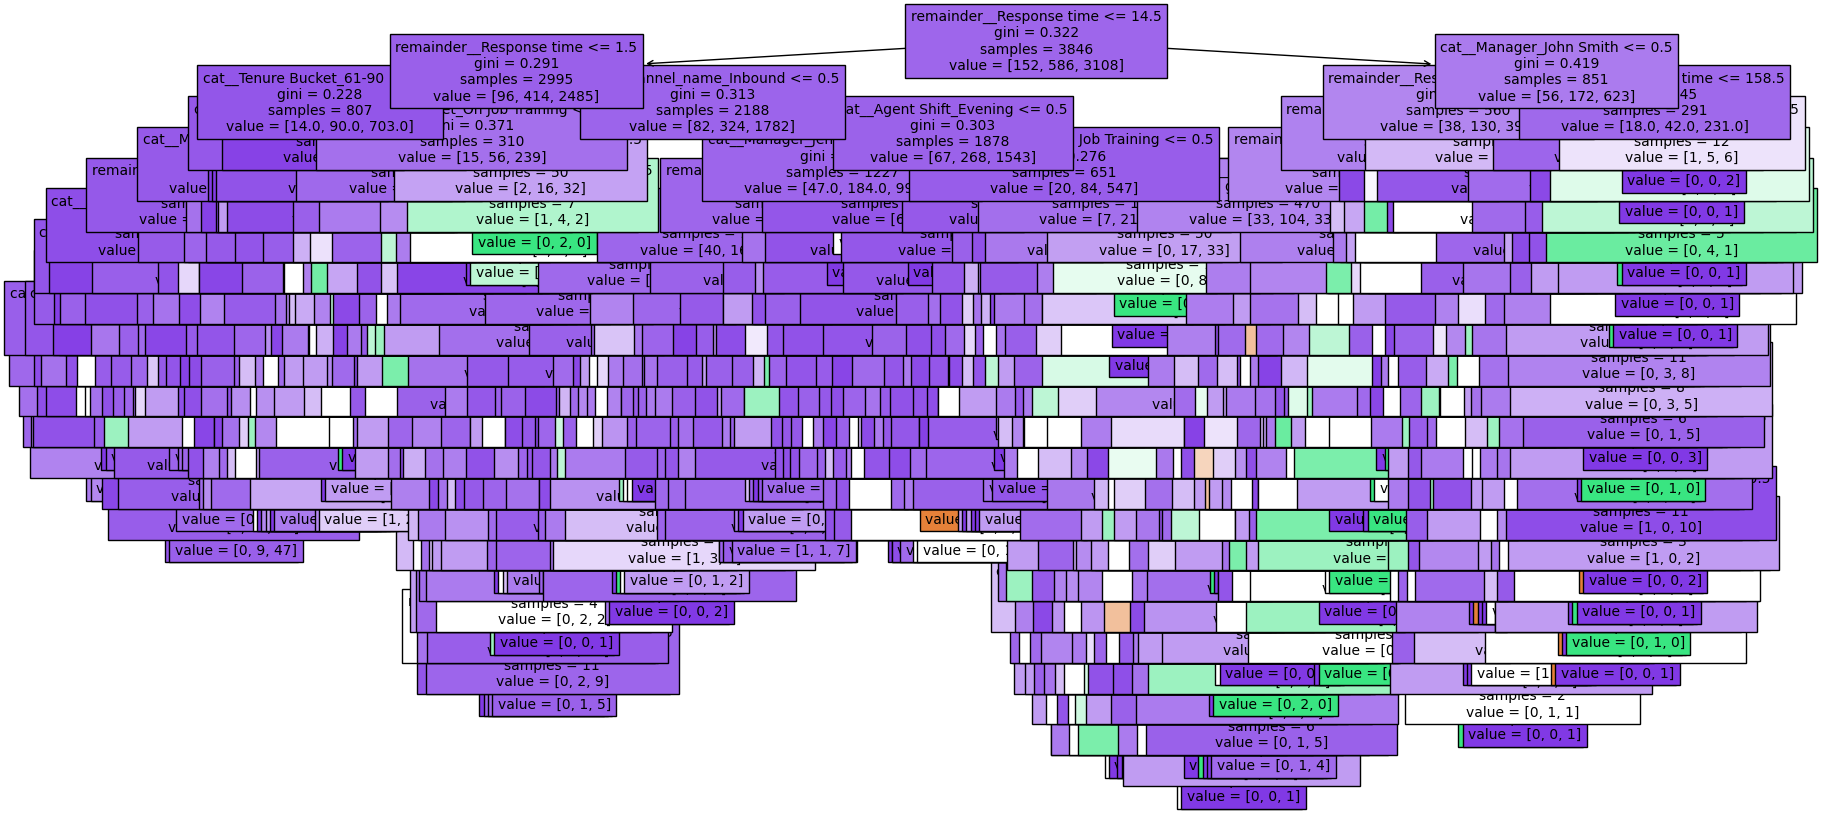

In [396]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

# Define features (X) and target variable (y)
X = cleaned_data_frame_copy[['Tenure Bucket', 'Agent Shift', 'channel_name', 'Manager', 'Response time']]
y = cleaned_data_frame_copy['CSAT Score']

# Define column transformer for one-hot encoding categorical variables
categorical_features = ['Tenure Bucket', 'Agent Shift', 'channel_name', 'Manager']
categorical_transformer = OneHotEncoder(drop='first')  # Drop first column to avoid multicollinearity

# Combine one-hot encoded features with Response time using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Pass through 'Response time' feature without transformation
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline with preprocessing and decision tree classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = pipeline.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(pipeline.named_steps['classifier'], filled=True, fontsize=10, feature_names=pipeline.named_steps['preprocessor'].get_feature_names_out())
plt.show()


### Final comparison of the accuracy and F1 scores, between multivariate decision tree and PCA decision tree

#### We used F1 SCORE AND ACCURACY to evaluate the effectiveness. What are they?

Accuracy: Accuracy measures the proportion of correct predictions out of the total number of predictions made by the model. It is calculated as the number of correct predictions divided by the total number of predictions. Accuracy gives an overall indication of how often the model correctly predicts the outcome across all classes.

F1 Score: F1 score is the harmonic mean of precision and recall. Precision measures the proportion of true positive predictions out of all positive predictions made by the model, while recall measures the proportion of true positive predictions out of all actual positive instances in the dataset. F1 score balances both precision and recall and is particularly useful when dealing with imbalanced datasets where one class is much more frequent than the other.

The PCA trained prediction model did slightly better than if we were to just use a multivariate prediction model of the decision tree. 

The Accuracy score and the F1 score of PCA was higher at 
F1 Score: 0.7129765164158266
Accuracy: 0.735966735966736

While these were for non PCA 
F1 Score: 0.7014626783699713
Accuracy: 0.7182952182952183

#### The PCA Decision tree model has a relatively good prediction of the CSAT SCORE at about 70% accuracy and a good F1 score of also about 0.71, meaning that there's a good balance performance between precision and recall in a classification task


#### Describing the decision tree produced from PCA decision tree model 

Due to the multiple data variables and hence multiple variances in the data from each data and their corresponding categorical values and numerical values, the final decision tree has many nodes that each leads to a predictive value for the categorical data CSAT score. 


#### Why are PCA Decision Tree predictions better than the multivariate one?

Decision tree learning with PCA variables may sometimes better compared to using the original multivariate variables for several reasons:

Dimensionality reduction: PCA reduces the dimensionality of the feature space by transforming the original variables into a smaller set of principal components. This can lead to simpler decision trees with fewer nodes and splits, making them easier to interpret and less prone to overfitting.

Noise reduction: PCA tends to remove noise and redundant information from the dataset, focusing on the principal components that capture the most significant variability in the data. This can result in decision trees that are more robust and generalize better to unseen data.

Improved interpretability: PCA variables often represent combinations of the original variables that capture underlying patterns or structures in the data. Decision trees built on these variables may uncover more interpretable relationships between features and the target variable.
